# Communicate Data Findings (Dataset: Loan Data from prosper)

***Preliminary Wrangling***

The Dataset contains 113,917 loans, each row include infomation on the borrow's APR, status, borrowed amount, debt, etc. This investigation will be analyzing factors that influence borrow's APR and how each loan were taken by what type of borrowers.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# expand maximun number of columns and row dosplayed

pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

In [3]:
# load the raw dataset
df_loan = pd.read_csv("prosperLoanData.csv")
df_loan.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
# preview the dataset
print(df_loan.shape)
print(df_loan.dtypes)

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


In [5]:
# view the statistics
df_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [6]:
# see number of duplicated data entries
sum(df_loan.duplicated())

0

In [7]:
# see number of null values on each columns
df_loan.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [8]:
# filter out loans without ProsperScores
df_loan_2 = df_loan[df_loan['ProsperScore'].isnull()==False]

In [9]:
# remove columns and columns with empty values that are not useful in the Dateset
df_loan_2.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber'], axis=1, inplace = True)

C:\Users\ANIRBAN DEY\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


***What is the structure of our dataset?***

There are total of 113937 loans entries saved in the dataset and 81 attributes. Each loan contain information on the borrowered's background information and details regarding the loans

***What is/are the main feature(s) of interest in our dataset?***

The Borrower's APR will be analyzied with many factors such as the borrower's rating, score, occupation and income that could influence change in borrower's APR.

***What features in the dataset do you think will help support your investigation into our feature(s) of interest?***

The Prosper Rating and score could show low Borrower's APR because higher rating reflect the borrower's personality to be more trustworthy. Creditscore could also have similar effect on Borrower's APR as Prosper Rating.



# Univariate Exploration

In [ ]:
# check where APR has the most counts
df_loan_2.BorrowerAPR.value_counts().head()

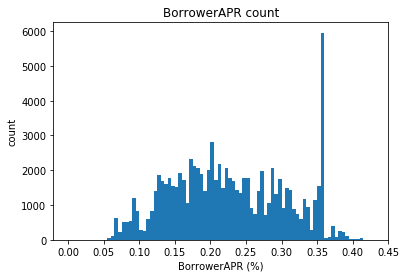

In [11]:
# see the counts for all BorrowerAPR values
bins = np.arange(0, df_loan_2['BorrowerAPR'].max(), 0.005)
plt.hist(data = df_loan_2, x = 'BorrowerAPR', bins = bins)
plt.title('BorrowerAPR count')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, df_loan_2['BorrowerAPR'].max()+0.05, 0.05));

BorrowerAPR count: There is roughly one normal distribution with two exceptional high counts when BorrowerAPR are 0.35797% and 0.35643%.

Next: ProsperScore

In [12]:
df_loan_2['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

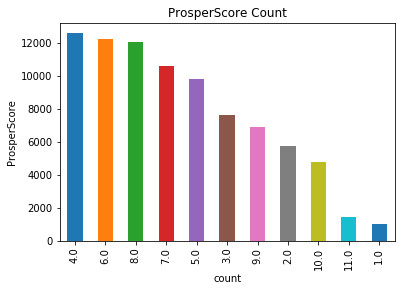

In [13]:
# see which ProsperScore borrowers received the most

df_loan_2['ProsperScore'].value_counts().plot(kind='bar')
plt.title('ProsperScore Count')
plt.xlabel('count')
plt.ylabel('ProsperScore')
plt.fontsize = 12
plt.figsize=(12,12)

ProsperScore Count: Seems most borrower are given with low score. The lower the score, the higher borrower counts it has.

Next: Occupation

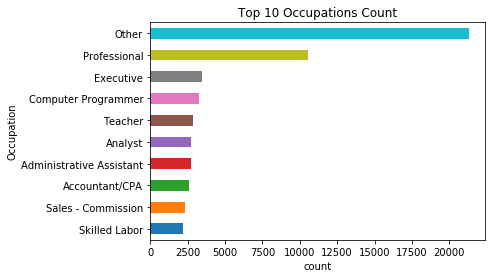

In [33]:
# see the top 10 occupations of borrowers

df_loan_2['Occupation'].value_counts()[9::-1].plot(kind='barh')
plt.title('Top 10 Occupations Count')
plt.xlabel('count')
plt.ylabel('Occupation')
plt.fontsize = 12
plt.figsize=(12,12)

Top 10 Occupations Count: most borrowers enter their occupations as "others" or "professional" because they might not want to share this information. The rest of the occupations do not show big increase compare to others.

Next: occupation vs APR means

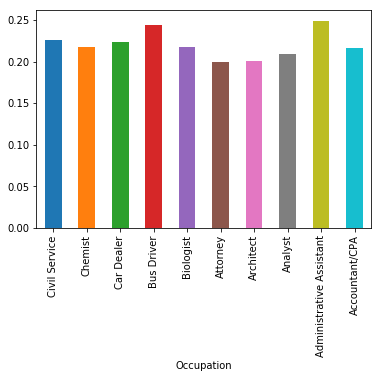

In [15]:
# bar plot for APR means for each top 10 occupations.

Top_Occupation = df_loan_2.groupby('Occupation').BorrowerAPR.mean()[9::-1]
Top_Occupation.plot(kind = 'bar')

Top 10 Occupations Count: It is interesting to find out who the top occupations are. But all these occupations have about same BorrowerAPR values. Therefore occupation is not the best factor to analyze the BorrowerAPR, because it is unclear and many other reasons should also be considers to be analyzed.

Next: ProsperRating vs BorrowerAPR mean

In [16]:
ProsperRating_mean = df_loan_2.groupby('ProsperRating (Alpha)').BorrowerAPR.mean()
ProsperRating_mean

ProsperRating (Alpha)
A     0.138909
AA    0.090041
B     0.184030
C     0.226124
D     0.280581
E     0.330551
HR    0.356061
Name: BorrowerAPR, dtype: float64

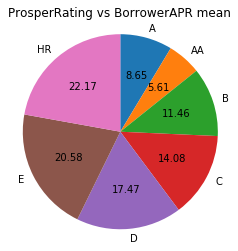

In [17]:
# plot bar chart for ProsperRating vs BorrowerAPR mean

ProsperRating_mean = df_loan_2.groupby('ProsperRating (Alpha)').BorrowerAPR.mean()
ProsperRating_mean

plt.pie(ProsperRating_mean, labels = ProsperRating_mean.index, startangle = 90,
    counterclock = False, autopct='%1.2f')
plt.axis('square') 
plt.title('ProsperRating vs BorrowerAPR mean');

ProsperRating vs BorrowerAPR mean: Borrowers Rating are displayed in order from highest rating to lowest rating (AA, A, B, C, D, E, HR). We can see a pattern that the highest rating of AA received lowest APR (5.61), whereas the lowerest rating received the highest APR (22.17). This proves the point that borrowers with higher rating received lower APR as discussed earlier.

Next: Delinquencies from the last 7 years

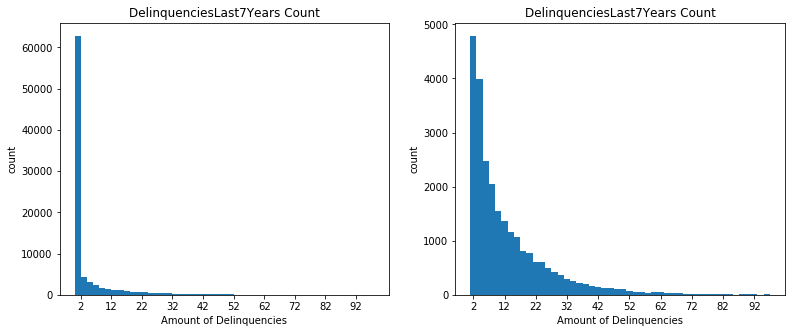

In [18]:
# Histogram for Delinquencies records count from the Last 7Years. 

plt.figure(figsize = [13, 5]) 


plt.subplot(1, 2, 1)
bins = np.arange(0, df_loan_2['DelinquenciesLast7Years'].max(), 2)
plt.hist(data = df_loan_2, x = 'DelinquenciesLast7Years', bins = bins)
plt.xticks(np.arange(2, 100+1, 10))
plt.title('DelinquenciesLast7Years Count')
plt.xlabel('Amount of Delinquencies')
plt.ylabel('count');

plt.subplot(1, 2, 2)
bins = np.arange(1, df_loan_2['DelinquenciesLast7Years'].max(), 2)
plt.hist(data = df_loan_2, x = 'DelinquenciesLast7Years', bins = bins)
plt.xticks(np.arange(2, 100+1, 10))
plt.title('DelinquenciesLast7Years Count')
plt.xlabel('Amount of Delinquencies')
plt.ylabel('count');

DelinquenciesLast7Years Count: Most borrowers has no Delinquencies records. Another plot is ploted to exclude borrowers with 0 Delinquencies record. The counts seems to be decreased exponentially with higher number of Delinquencies.

Next CreditScoreRangeLower & CreditScoreRangeUpper

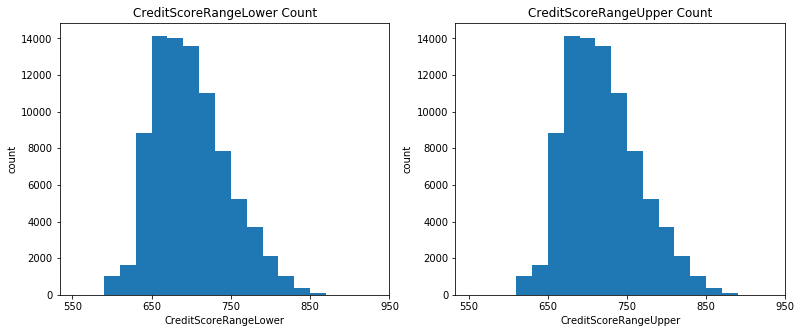

In [19]:
# Histogram for Delinquencies records count from the Last 7Years. 

plt.figure(figsize = [13, 5]) 


plt.subplot(1, 2, 1)
bins = np.arange(550, df_loan_2['CreditScoreRangeLower'].max(), 20)
plt.hist(data = df_loan_2, x = 'CreditScoreRangeLower', bins = bins)
plt.xticks(np.arange(550, 1000, 100))
plt.title('CreditScoreRangeLower Count')
plt.xlabel('CreditScoreRangeLower')
plt.ylabel('count');

plt.subplot(1, 2, 2)
bins = np.arange(550, df_loan_2['CreditScoreRangeUpper'].max(), 20)
plt.hist(data = df_loan_2, x = 'CreditScoreRangeUpper', bins = bins)
plt.xticks(np.arange(550, 1000, 100))
plt.title('CreditScoreRangeUpper Count')
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('count');

In [20]:
# check for outliers for credit score
print (df_loan.CreditScoreRangeUpper.describe())
print (df_loan.CreditScoreRangeLower.describe())

count    113346.000000
mean        704.567731
std          66.458275
min          19.000000
25%         679.000000
50%         699.000000
75%         739.000000
max         899.000000
Name: CreditScoreRangeUpper, dtype: float64
count    113346.000000
mean        685.567731
std          66.458275
min           0.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: CreditScoreRangeLower, dtype: float64


CreditScoreRangeUpper Count & CreditScoreRangeLower Count: The two histograms show very similar trends. This is expected because upper and lower credit are aranged in fixed ratios. Other to that, there are no outliers that fall out of the range.

Next: AvailableBankcardCredit

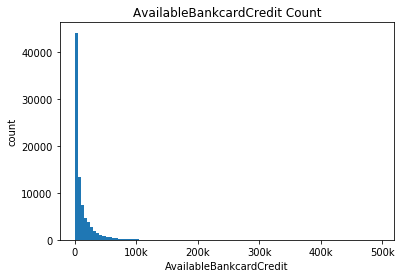

In [21]:
# see counts for AvailableBankcardCredit

bins = np.arange(0, df_loan_2['AvailableBankcardCredit'].max(), 5000)
plt.hist(data = df_loan_2, x = 'AvailableBankcardCredit', bins = bins)
plt.xticks([0, 1e5, 2e5, 3e5, 4e5, 5e5], [0, '100k', '200k', '300k', '400k', '500k'])
plt.title('AvailableBankcardCredit Count')
plt.xlabel('AvailableBankcardCredit')
plt.ylabel('count');

AvailableBankcardCredit Count: Most AvailableBankcardCredit counts fall in values from 0 to 100k. Clearly there are few percent of people who have higher bank total credits than majority of people.

Next: the next few cells will adjust and filter out the dataframe for people with high AvailableBankcardCredit. Then plot the same countplot again.

In [22]:
# See who's Creditavailible is more than 200k
High_Creditavailible = df_loan_2[df_loan_2['AvailableBankcardCredit'] > 150000]
High_Creditavailible.AvailableBankcardCredit.sort_values(ascending = False)

80178     498374.0
92406     432613.0
98518     413367.0
99673     412785.0
64246     406125.0
41112     403880.0
86383     403534.0
45212     395500.0
58930     373348.0
38163     364284.0
56942     360000.0
39963     360000.0
43607     360000.0
61020     360000.0
76296     360000.0
1801      360000.0
32553     350777.0
99273     305996.0
43998     302928.0
8352      285475.0
69640     273978.0
84947     267126.0
49365     265757.0
68191     264939.0
80379     256031.0
24958     246231.0
27990     241928.0
41929     238114.0
44416     237704.0
64323     228829.0
31141     227347.0
85922     225413.0
54325     223896.0
73613     217557.0
54038     217349.0
18457     217218.0
111386    215434.0
23693     213800.0
106726    212800.0
49261     212613.0
7337      210764.0
94729     206964.0
63908     206000.0
74369     204322.0
40041     203472.0
7448      202528.0
65874     202397.0
17455     201674.0
24493     200395.0
62779     195685.0
110598    194405.0
87618     190480.0
73521     18

In [23]:
len(High_Creditavailible['AvailableBankcardCredit'])

113

In [24]:
# remove fewer people who has high Creditavailible
df_loan_3 = df_loan_2.drop(High_Creditavailible.index)

# check
len(df_loan_3[df_loan_3['AvailableBankcardCredit'] > 150000])

0

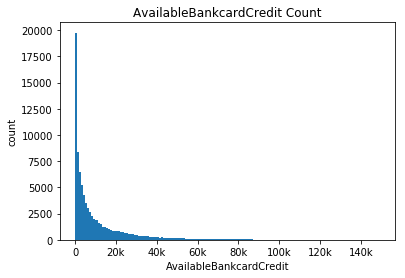

In [25]:
# plot again for AvailableBankcardCredit count with new filter data

bins = np.arange(0, df_loan_3['AvailableBankcardCredit'].max(), 1000)
plt.hist(data = df_loan_3, x = 'AvailableBankcardCredit', bins = bins)
plt.xticks([0, 2e4, 4e4, 6e4, 8e4, 1e5, 1.2e5, 1.4e5],
           [0, '20k', '40k', '60k', '80k', '100k', '120k', '140k'])
plt.title('AvailableBankcardCredit Count')
plt.xlabel('AvailableBankcardCredit')
plt.ylabel('count');

***Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?***

The variables are explored for more understanding of Borrower's APR. From AvailableBankcardCredit count plot shown above, most borrowers has AvailableBankcardCreditare within 1000k. There are 113 borrowers with AvailableBankcardCreditare higher than 150k were removed from the data because they are away from most of the data point shown in the plot. Also, looking at BorrowerAPR count, there are two BorrowerAPR counts that were higher than rest of the values. Due to high number counts falling into those two values, there might be resonable reasons these two values are used. Therefore, the two BorrowerAPR values are kept untouched.

***Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?***

The countplots for ProsperScore Delinquencies, Last7Years and AvailableBankcardCreditare are right skewed. CreditScoreRangeUpper & CreditScoreRangeLower follow a normal distribution curve.

# Bivariate Exploration

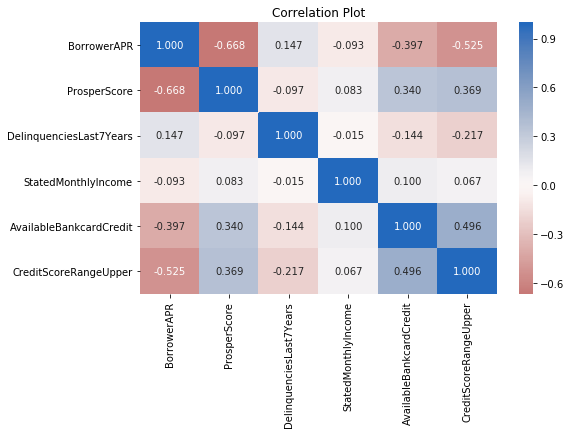

In [26]:
# correlation plot 

num_vars = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 
            'StatedMonthlyIncome', 'AvailableBankcardCredit', 'CreditScoreRangeUpper']

plt.figure(figsize = [8, 5])
sb.heatmap(df_loan_3[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

Correlation Plot: There are no strong positive relationships between any pairs. It makes sense because higher AvailableBankcardCredit has better creditscore. BorrowerAPR and ProsperScore are negative because borrowers with lower score are more likely to pay higher APR. Similarly, higher CreditScore means the borrowers are more trustworthy, therefore it recevied lower APR.

Next: lets see the scatter plot to pair up all above variables.

C:\Users\ANIRBAN DEY\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


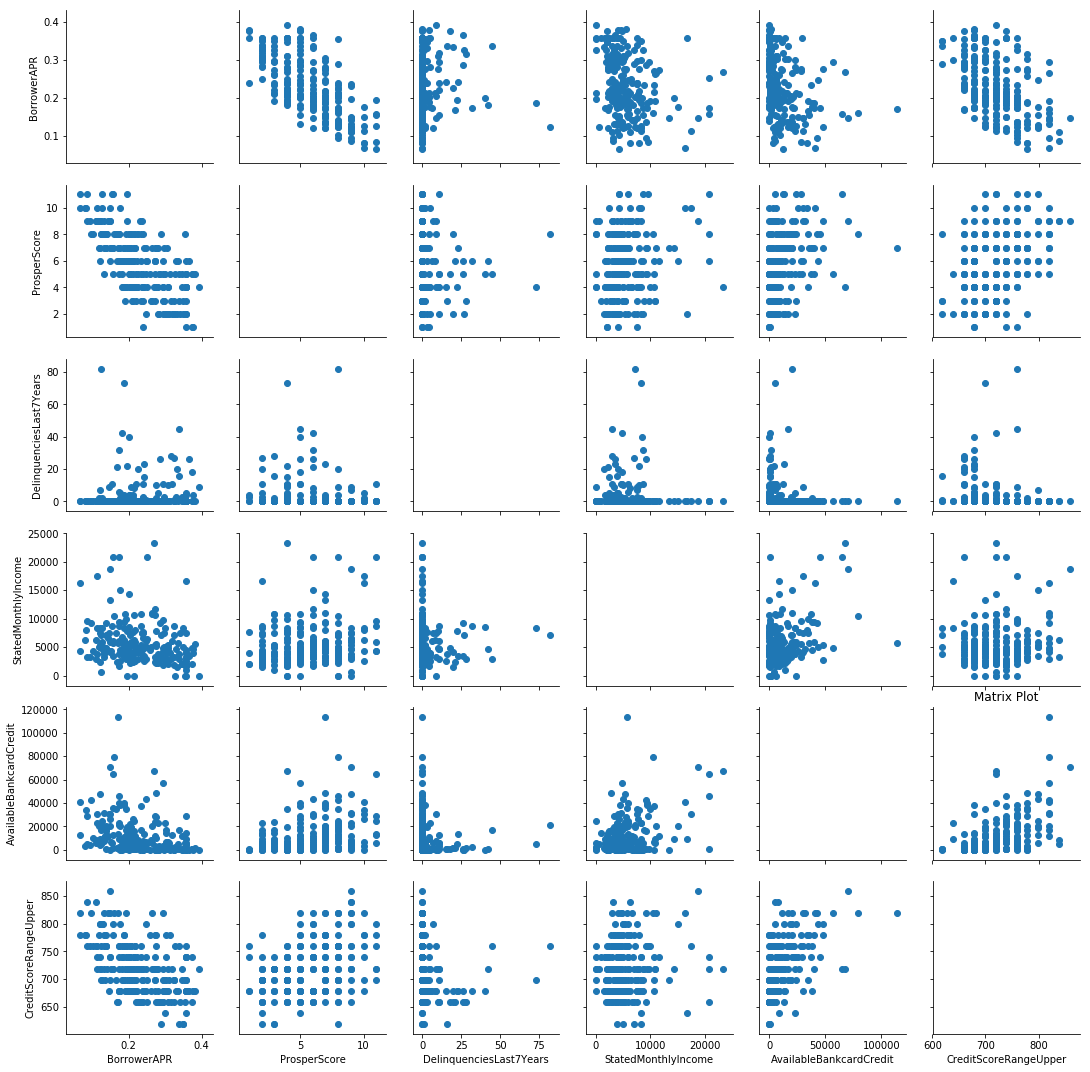

In [27]:
# plot matrix: only 300 random loans are used to see the pattern more clearer


num_vars = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 
            'StatedMonthlyIncome', 'AvailableBankcardCredit', 'CreditScoreRangeUpper']

samples = np.random.choice(df_loan_3.shape[0], 300, replace = False)
loan_samp = df_loan_3.loc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = num_vars)
g.map_offdiag(plt.scatter)
plt.title('Matrix Plot');

Matrix Plot: Similar to the correlation plot, we can determine which pair has negative or positive relationships from analyzing the pattern in each scatter plots. ProsperScore seems to be more related to BorrowerAPR compare to other variables. StatedMonthlyIncome does not give useful information on BorrowerAPR and will not be further analyzed.

Next: more plots to look at ProsperScore vs BorrowerAPR more closely

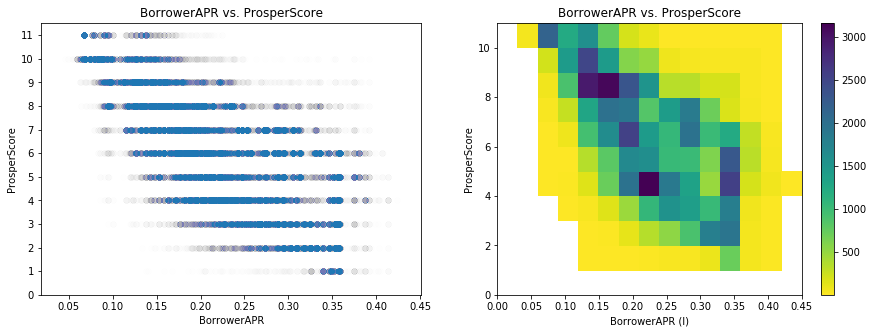

In [28]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_loan_3, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_loan_3['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, df_loan_3['ProsperScore'].max()+1, 1)
plt.hist2d(data = df_loan_3, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR (l)')
plt.ylabel('ProsperScore');


BorrowerAPR vs. ProsperScore: This make sense becasue people with higher rating tend to be more reliable and therefore given lower BorrowerAPR

Next: scatter and heat plot for BorrowerAPR vs. CreditScoreRangeUpper

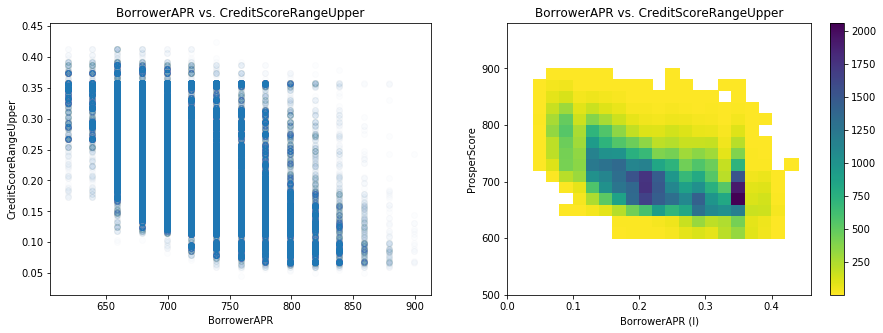

In [34]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_loan_3, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', alpha = 0.01)
plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');


plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_loan_2['BorrowerAPR'].max()+0.05, 0.02)
bins_y = np.arange(500, df_loan_2['CreditScoreRangeUpper'].max()+100, 20)
plt.hist2d(data = df_loan_3, x = 'BorrowerAPR', y = 'CreditScoreRangeUpper', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR (l)')
plt.ylabel('ProsperScore');

BorrowerAPR vs. CreditScoreRangeUpper: even though the the pts are all over the plot. with the help of alpha feature, we can still see the trend that the higher the CreditScore leads to lower APR percentage. The heatmap on the same variables helps to make this point more clear.

Next: Violin plot for BorrowerAPR vs. ProsperRating & ProsperScore

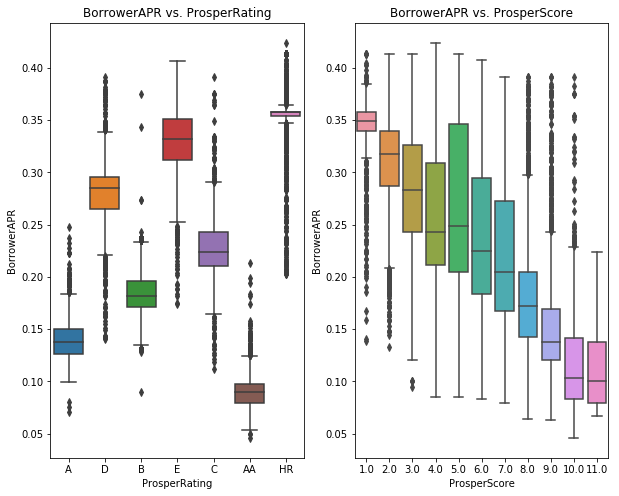

In [29]:
# Violin plot for BorrowerAPR vs. ProsperRating & ProsperScore. Shows higher rating has lower BorrowerAPR
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
sb.boxplot(data = df_loan_2, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR')
plt.gcf().set_size_inches(10, 8)
plt.title('BorrowerAPR vs. ProsperRating')
plt.xlabel('ProsperRating')
plt.ylabel('BorrowerAPR')

plt.subplot(1, 2, 2)
sb.boxplot(data = df_loan_2, x = 'ProsperScore', y = 'BorrowerAPR')
plt.gcf().set_size_inches(10, 8)
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

Violin plot for BorrowerAPR vs. ProsperRating: For these two categorical variables, there is not much correlation on ProsperRating. Good or bad rating doesn't reflect the percentage of APR the borrower will get. For ProsperScore, there are clearly negative relationship with BorrowerAPR as discussed in Univariate Exploration.

***Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?***

The correlation and matrix plots are really helpful to preview all possibles variables related on BorrowerAPR we can trying to analyize. Out of all variables, ProsperScore has stronger relationship with BorrowerAPR (negative correlated). Univariate Exploration helps to examine data points and statistics about our variables. By looking into Bivariate Exploration, it is more clearly to gain more understanding and answer questions about BorrowerAPR.

***Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?***

The CreditScoreRangeUpper, AvailableBankcardCredit and CreditScoreRangeUpper are all positive correlated to ProsperScore and negative correlated to BorrwerAPR

# Multivariate Exploration

C:\Users\ANIRBAN DEY\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


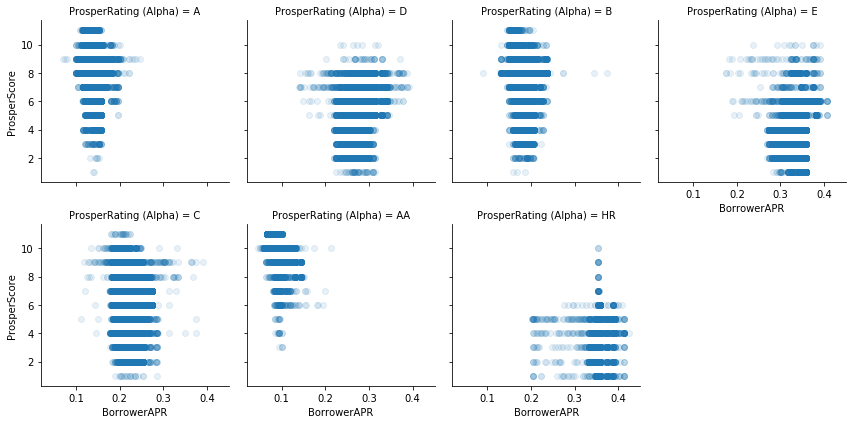

In [30]:
g = sb.FacetGrid(data = df_loan_3, col = 'ProsperRating (Alpha)', col_wrap = 4, size = 3)
g.map(plt.scatter, 'BorrowerAPR', 'ProsperScore', alpha = 0.1)
g.set_xlabels('BorrowerAPR')
g.set_ylabels('ProsperScore')

plt.show()

FacetGrid: This visualization helps to analyze BorrowerAPR vs ProsperScore on difference letter ratings. The patterns shows the lowerest rating(HR) of borrowers have the highest APR. For high rating A(A), the borrowers has the lowers APR. This visualization differenate groups of people in terms of APR received based on their rating and scores.

Next: BorrowerAPR vs. CreditScoreRangeUpper & ProsperScore

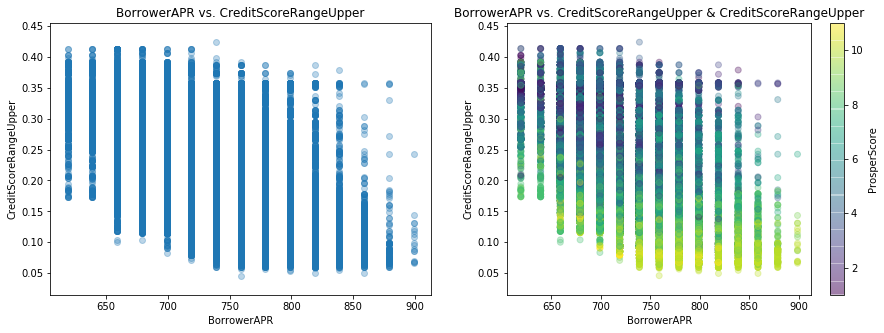

In [31]:
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_loan_3, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', alpha = 0.3)
plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');


plt.subplot(1, 2, 2)
plt.scatter(data = df_loan_3, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'ProsperScore')
plt.title('BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');

BorrowerAPR vs. CreditScoreRangeUpper & ProsperScore: Since CreditScoreRangeUpper and ProsperScore are positive correlated to borrowerAPR, this visualization helps to see the effects on BorrowerAPR again. We can see the CreditScoreRangeUpper increase as BorrowerAPR decrease in the plots. By adding ProsperScore to color encodings, BorrowerAPR decreases as ProsperScore increases. This proves the point that CreditScoreRangeUpper and ProsperScore negatively correlated to BorrowerAPR.

***Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?***

The correlation and matrix plots in previous plots can also be counted as part of Multivariate Exploration. To be more efficient, these two plots can be done ealier part of exploration to preview all variables and how they interact to each other. Adding to that, FacetGrid shows how each rating groups differ in terms of BorrowerAPR vs ProsperScore.

From all above visualizations created from univariate exploration to multivariate exploration, many variable are found to be negatively correlated to BorrowerAPR, whereas ProspoerScore gives the strongest negative relationship.